# Exercicio da aula 3

In [1]:
from matplotlib import pyplot as plt
##Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
##Read csv
df=pd.read_csv('Datasets/kc_house_data.csv')
df=pd.DataFrame(df)

#1. Crie uma nova coluna chamada 'dormitory_type'
- se o valor dacoluna 'bedrooms' for igual a 1 =studio
- se o valor dacoluna 'bedrooms' for igual a 2 =apartment
- se o valor dacoluna 'bedrooms' for igual a 3 =house

In [10]:
df['dormitory_type']='None'
df.loc[df['bedrooms']==1,'dormitory_type']='studio'
df.loc[df['bedrooms']==2,'dormitory_type']='apartment'
df.loc[df['bedrooms']>2,'dormitory_type']='house'

#2. Faça um grafico de barras que represente a soma dos preços pelo numero de quartos

<BarContainer object of 13 artists>

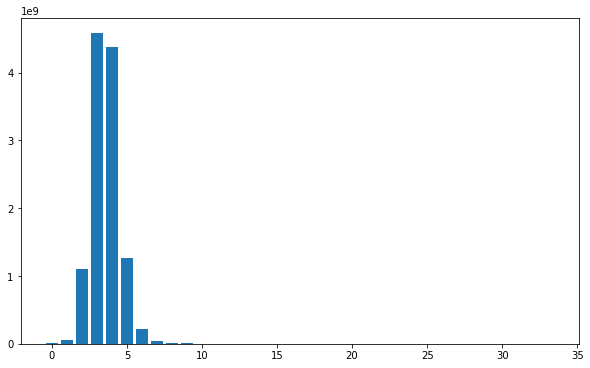

In [4]:
# axis X = yr_built
#axis Y = mean price
#bar graphs
plt.figure(figsize=(10,6))
bedrooms_price=df[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
plt.bar(bedrooms_price['bedrooms'],bedrooms_price['price'])

#3. Faça um grafico de linhas que represente a media dos preços pelo ano de construçao dos imoveis

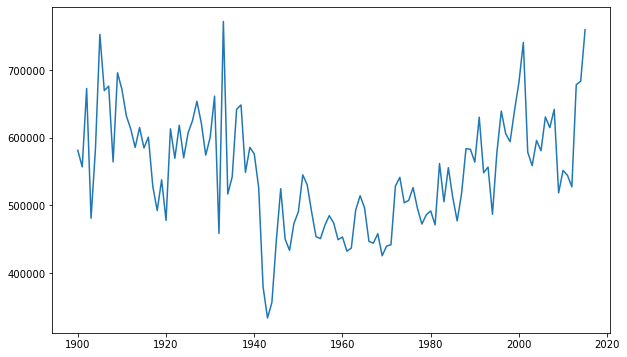

In [5]:
#axis X = yr_built
#axis Y = mean price
#bar graphs
plt.figure(figsize=(10,6))
df['yr_built']=pd.to_datetime(df['yr_built'],format='%Y',errors='coerce').dt.year
df['yr_built'].head()
built_price=df[['price','yr_built']].groupby('yr_built').mean().reset_index()
plt.plot(built_price['yr_built'],built_price['price'])

#4. Faça um grafico de barras que represente a media dos preços pelo tipo de dormitorio

<BarContainer object of 4 artists>

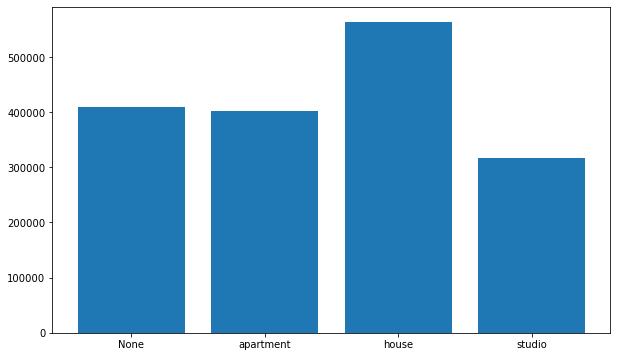

In [6]:
#axis X = yr_built
#axis Y = mean price
#bar graphs
plt.figure(figsize=(10,6))
dormitory_price=df[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
plt.bar(dormitory_price['dormitory_type'],dormitory_price['price'])

#5. Faça um grafico de linhas que mostre a evoluçao da media dos preços pelo ano da reforma dos imoveis, a partir do ano 1930

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
df1=df.loc[df['yr_renovated']>1930,['yr_renovated','price']].sort_values('yr_renovated')

<Figure size 720x432 with 0 Axes>

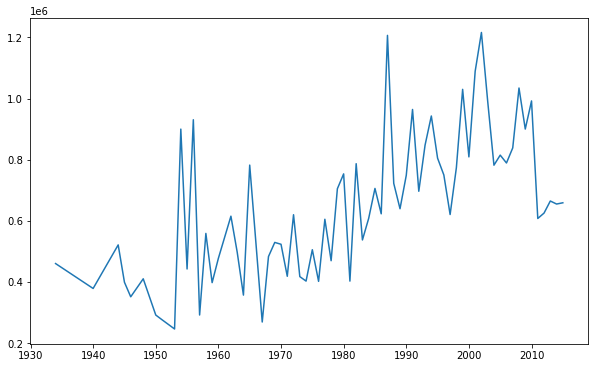

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
df1['yr_renovated']=pd.to_datetime(df1['yr_renovated'],format='%Y',errors='coerce')
renovated_price=df1[['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
plt.plot(renovated_price['yr_renovated'],renovated_price['price'])


#6. Faça uma tabela que mostre a mèdia dos preços por ano de construçao e tipo de dormitorios dos imoveis  

In [9]:
df[['price','yr_built','dormitory_type']].groupby(['yr_built','dormitory_type']).mean().reset_index()

,yr_built,dormitory_type,price
0,1900,apartment,589533.333
1,1900,house,584854.271
2,1900,studio,398944.000
3,1901,apartment,452856.400
4,1901,house,578619.167
...,...,...,...
309,2014,house,692687.717
310,2014,studio,516500.000
311,2015,apartment,543250.000
312,2015,house,797383.061


#7. Crie um dashboard  com os graficos das perguntas 2, 3 e 4 (Dashboard: 1 linha e 2 colunas)

<BarContainer object of 4 artists>

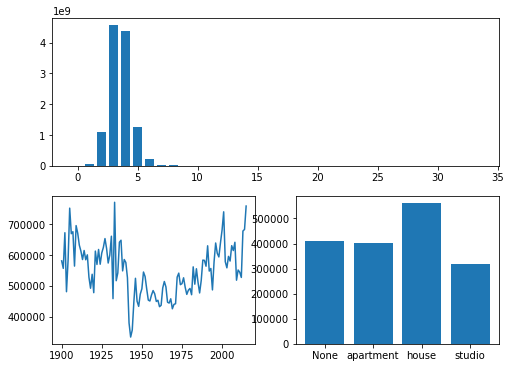

In [52]:
from matplotlib import gridspec
fig=plt.figure(figsize=(8,6))
specs=gridspec.GridSpec(ncols=2,nrows=2, figure=fig)

ax1=fig.add_subplot(specs[0,:])#FIRST ROW
ax2=fig.add_subplot(specs[1,0])#SECOND ROW, FIRST COLUMN
ax3=fig.add_subplot(specs[1,1])#SECOND ROW, SECOND COLUMN

#first graph
bedrooms_price=df[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(bedrooms_price['bedrooms'],bedrooms_price['price'])

#second graph

df['year_built']=pd.to_datetime(df['yr_built'],format='%Y',errors='coerce').dt.year
df['year_built'].head()
built_price=df[['price','year_built']].groupby('year_built').mean().reset_index()
ax2.plot(built_price['year_built'],built_price['price'])

#third graph
dormitory_price=df[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax3.bar(dormitory_price['dormitory_type'],dormitory_price['price'])

#8. Crie um dashboard  com os graficos das perguntas 2, 4 (Dashboard: 2 colunas)

<BarContainer object of 4 artists>

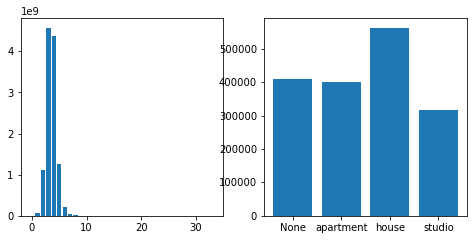

In [53]:
from matplotlib import gridspec
fig=plt.figure(figsize=(8,8))
specs=gridspec.GridSpec(ncols=2,nrows=2, figure=fig)

ax1=fig.add_subplot(specs[0,0])#FIRST ROW
ax2=fig.add_subplot(specs[0,1])#FIRST ROW, SECOND COLUMN


bedrooms_price=df[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(bedrooms_price['bedrooms'],bedrooms_price['price'])

dormitory_price=df[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax2.bar(dormitory_price['dormitory_type'],dormitory_price['price'])

#9. Crie um dashboard  com os graficos das perguntas 3 e 5 (Dashboard: 2 linhas)

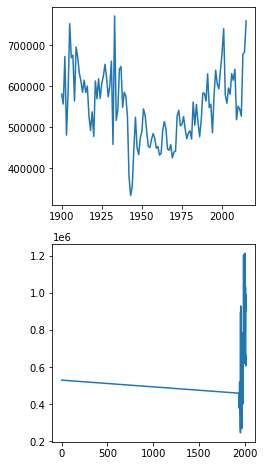

In [54]:
from matplotlib import gridspec
fig=plt.figure(figsize=(8,8))
specs=gridspec.GridSpec(ncols=2,nrows=2, figure=fig)

ax1=fig.add_subplot(specs[0,0])#FIRST ROW
ax2=fig.add_subplot(specs[1,0])#SECOND ROW

#first
built_price=df[['price','yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot(built_price['yr_built'],built_price['price'])

#second
renovated_price=df[['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot(renovated_price['yr_renovated'],renovated_price['price'])

#10. Faca um grafico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

In [55]:
import plotly.express as px
houses=df[['id','long', 'lat', 'sqft_living']]
fig=px.scatter_mapbox(houses,
                  lat='lat',
                  lon='long',
                    size='sqft_living',
                  color_continuous_scale=px.colors.cyclical.IceFire,size_max=15,zoom=12)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=300,margin={'r':0,'t':0,'l':0,'b':0})
fig.show()


ModuleNotFoundError: No module named 'plotly'

In [1]:
!pip install jupyterthemes

In [7]:
!jt -t grade3

In [1]:
!jt -r

Reset css and font defaults in:
C:\Users\Alessandra\.jupyter\custom &
C:\Users\Alessandra\AppData\Roaming\jupyter\nbextensions
